## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print("✓ Libraries imported successfully!")
print("Random Forest: Ensemble of Decision Trees")

✓ Libraries imported successfully!
Random Forest: Ensemble of Decision Trees


## 2. Understanding Decision Trees

### How Decision Trees Work:

1. **Split** data based on features
2. **Repeat** recursively for each branch
3. **Stop** at leaf nodes (pure or max depth)
4. **Predict** based on majority class in leaf

### Analogy:
Like a flowchart of yes/no questions to classify data!

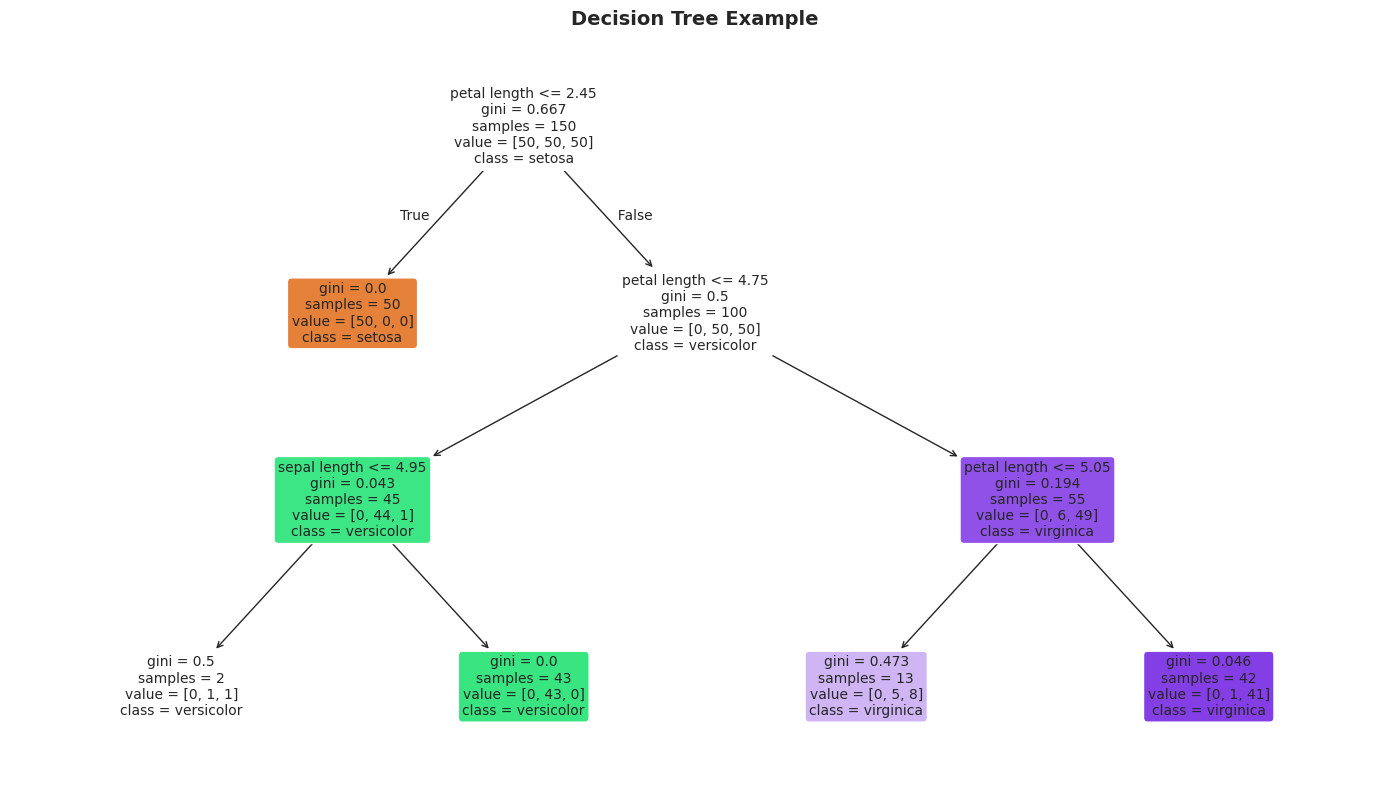

✓ Single Decision Tree
Accuracy: 0.9533


In [2]:
# Simple decision tree example
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

# Load simple dataset
iris = load_iris()
X_simple = iris.data[:, [0, 2]]  # Use only 2 features for visualization
y_simple = iris.target

# Train decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_simple, y_simple)

# Visualize tree
plt.figure(figsize=(14, 8))
plot_tree(tree, feature_names=['sepal length', 'petal length'],
          class_names=['setosa', 'versicolor', 'virginica'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Example', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Single Decision Tree")
print(f"Accuracy: {tree.score(X_simple, y_simple):.4f}")

## 3. Understanding Random Forest

### What is Random Forest?

**Random Forest = Multiple Decision Trees + Voting**

### Key Ideas:

1. **Bootstrap Sampling**: Each tree trained on random subset
2. **Random Features**: Each split considers random features
3. **Voting**: Final prediction by majority vote

### Advantages:

✅ Reduces overfitting (compared to single tree)  
✅ Handles non-linear data well  
✅ Provides feature importance  
✅ Works well out-of-the-box  
✅ Robust to outliers  

### Disadvantages:

❌ Less interpretable than single tree  
❌ Slower than simple models  
❌ Can be memory intensive  

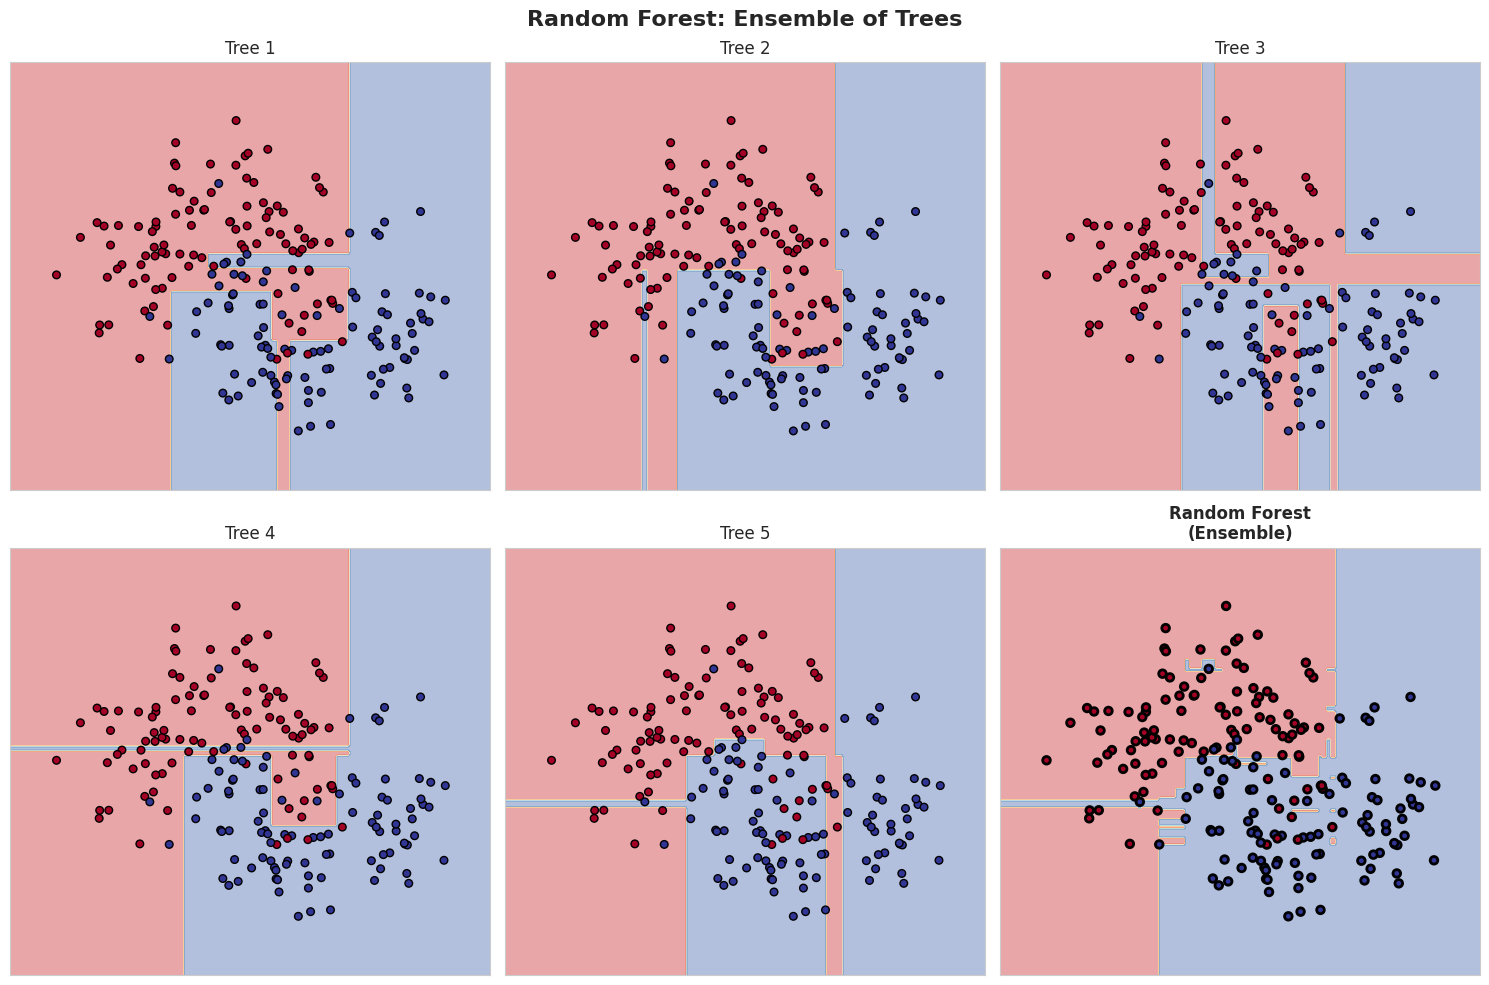

Each tree makes different errors, but ensemble corrects them!


In [3]:
# Visualize Random Forest concept
def visualize_random_forest_concept():
    """Show how Random Forest combines multiple trees"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Random Forest: Ensemble of Trees', 
                fontsize=16, fontweight='bold')
    
    # Create simple 2D dataset
    from sklearn.datasets import make_moons
    X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
    
    # Train individual trees with different random states
    for idx, ax in enumerate(axes.flat[:5]):
        # Train tree on bootstrapped sample
        tree = DecisionTreeClassifier(max_depth=5, random_state=idx)
        
        # Bootstrap sample
        indices = np.random.choice(len(X), len(X), replace=True)
        tree.fit(X[indices], y[indices])
        
        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                            np.arange(y_min, y_max, 0.02))
        
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', 
                  edgecolors='black', s=30)
        ax.set_title(f'Tree {idx + 1}', fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
    rf.fit(X, y)
    
    # Plot Random Forest decision
    Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rf = Z_rf.reshape(xx.shape)
    
    axes[1, 2].contourf(xx, yy, Z_rf, alpha=0.4, cmap='RdYlBu')
    axes[1, 2].scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                      edgecolors='black', s=30, linewidths=2)
    axes[1, 2].set_title('Random Forest\n(Ensemble)', 
                        fontsize=12, fontweight='bold')
    axes[1, 2].set_xticks([])
    axes[1, 2].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    print("Each tree makes different errors, but ensemble corrects them!")

visualize_random_forest_concept()

## 4. Build Random Forest Face Recognizer

In [4]:
# Create synthetic face recognition dataset
X, y = make_classification(
    n_samples=500,
    n_features=50,
    n_informative=40,
    n_redundant=5,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Dataset prepared:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {X_train.shape[1]}")
print(f"  Classes: {len(np.unique(y))}")

Dataset prepared:
  Training samples: 350
  Test samples: 150
  Features: 50
  Classes: 3


In [5]:
# Train Random Forest
print("Training Random Forest...\n")

rf = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum tree depth
    min_samples_split=5,   # Min samples to split
    min_samples_leaf=2,    # Min samples in leaf
    max_features='sqrt',   # Features per split
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

rf.fit(X_train, y_train)

# Evaluate
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy:     {test_score:.4f}")

# Predictions
y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Person A', 'Person B', 'Person C']))

Training Random Forest...

Training Accuracy: 1.0000
Test Accuracy:     0.7200

Classification Report:
              precision    recall  f1-score   support

    Person A       0.76      0.76      0.76        51
    Person B       0.68      0.64      0.66        50
    Person C       0.71      0.76      0.73        49

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150



## 5. Feature Importance Analysis

One of Random Forest's best features!

Feature Importance Ranking:
 1. Feature 41: 0.0492
 2. Feature  8: 0.0336
 3. Feature 34: 0.0332
 4. Feature 26: 0.0312
 5. Feature 27: 0.0303
 6. Feature 38: 0.0270
 7. Feature 11: 0.0268
 8. Feature 39: 0.0266
 9. Feature 28: 0.0263
10. Feature 21: 0.0256


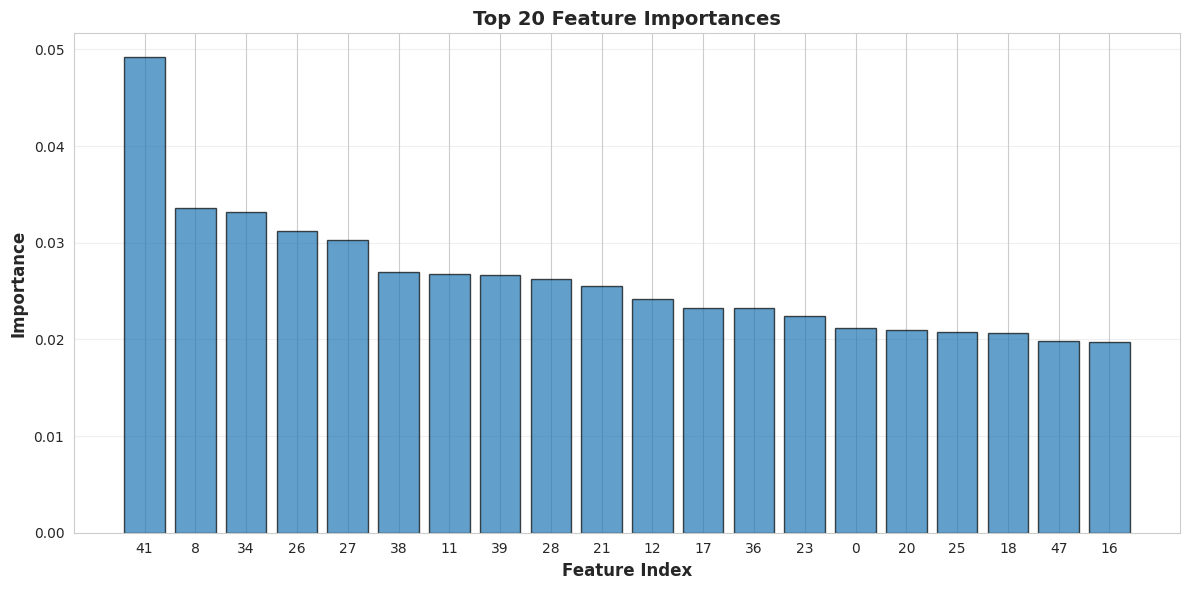

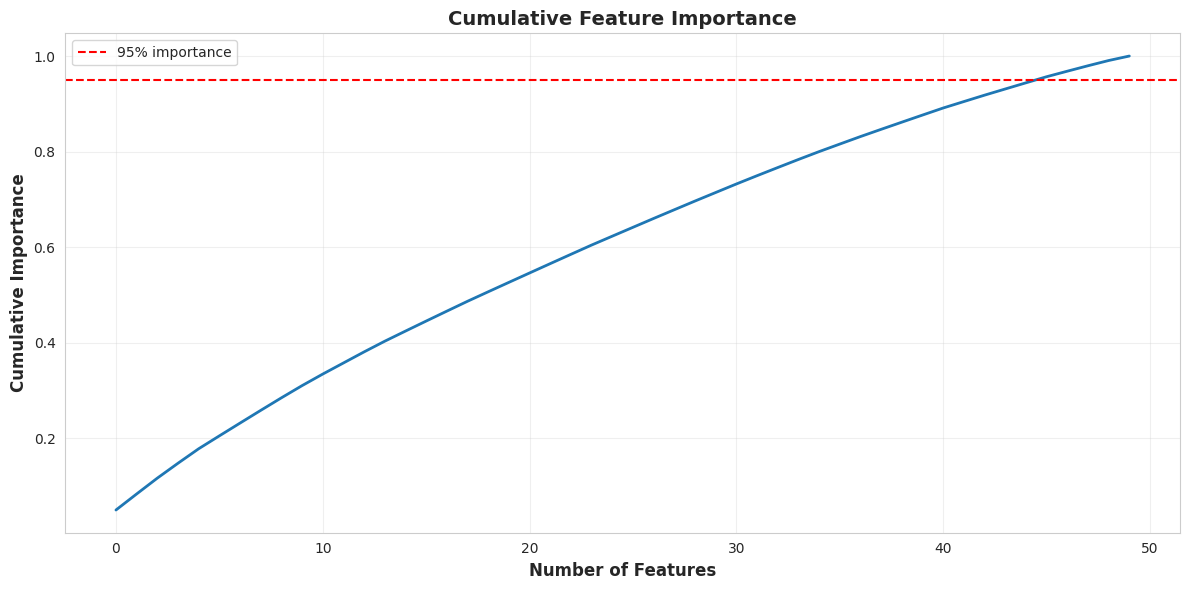


Features needed for 95% importance: 46/50


In [6]:
# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature Importance Ranking:")
print("="*50)
for i in range(min(10, len(importances))):
    print(f"{i+1:2d}. Feature {indices[i]:2d}: {importances[indices[i]]:.4f}")

# Visualize top 20 features
plt.figure(figsize=(12, 6))
plt.bar(range(20), importances[indices[:20]], alpha=0.7, edgecolor='black')
plt.xlabel('Feature Index', fontsize=12, fontweight='bold')
plt.ylabel('Importance', fontsize=12, fontweight='bold')
plt.title('Top 20 Feature Importances', fontsize=14, fontweight='bold')
plt.xticks(range(20), indices[:20])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Cumulative importance
cumsum = np.cumsum(importances[indices])
plt.figure(figsize=(12, 6))
plt.plot(cumsum, linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% importance')
plt.xlabel('Number of Features', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Importance', fontsize=12, fontweight='bold')
plt.title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# How many features for 95% importance?
n_features_95 = np.argmax(cumsum >= 0.95) + 1
print(f"\nFeatures needed for 95% importance: {n_features_95}/{len(importances)}")

## 6. Effect of Number of Trees

Testing different numbers of trees...
    1 trees: Train=0.7686, Test=0.3533
    5 trees: Train=0.9143, Test=0.4467
   10 trees: Train=0.9886, Test=0.5333
   25 trees: Train=1.0000, Test=0.5667
   50 trees: Train=1.0000, Test=0.6467
  100 trees: Train=1.0000, Test=0.7000
  200 trees: Train=1.0000, Test=0.7133
  500 trees: Train=1.0000, Test=0.7467


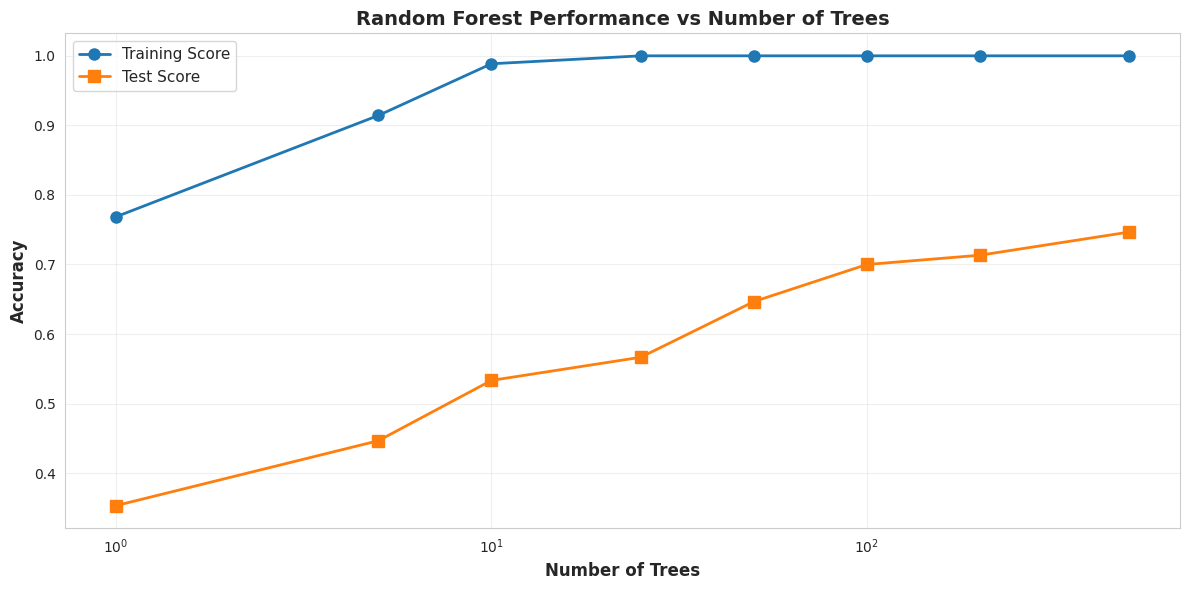


Optimal: ~100 trees (good balance of performance and speed)


In [7]:
# Test different numbers of trees
n_estimators_range = [1, 5, 10, 25, 50, 100, 200, 500]
train_scores = []
test_scores = []

print("Testing different numbers of trees...")
for n_est in n_estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_est, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train, y_train)
    
    train_scores.append(rf_temp.score(X_train, y_train))
    test_scores.append(rf_temp.score(X_test, y_test))
    
    print(f"  {n_est:3d} trees: Train={train_scores[-1]:.4f}, Test={test_scores[-1]:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_scores, 'o-', linewidth=2, 
        markersize=8, label='Training Score')
plt.plot(n_estimators_range, test_scores, 's-', linewidth=2, 
        markersize=8, label='Test Score')
plt.xscale('log')
plt.xlabel('Number of Trees', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Random Forest Performance vs Number of Trees', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal: ~100 trees (good balance of performance and speed)")

## 7. Comparing: Single Tree vs Random Forest

In [8]:
# Train single decision tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Compare
comparison = {
    'Model': ['Single Tree', 'Random Forest'],
    'Train Accuracy': [
        tree.score(X_train, y_train),
        rf.score(X_train, y_train)
    ],
    'Test Accuracy': [
        tree.score(X_test, y_test),
        rf.score(X_test, y_test)
    ],
    'Overfitting': [
        tree.score(X_train, y_train) - tree.score(X_test, y_test),
        rf.score(X_train, y_train) - rf.score(X_test, y_test)
    ]
}

df_comparison = pd.DataFrame(comparison)
print("\nSingle Tree vs Random Forest:")
print("="*60)
print(df_comparison.to_string(index=False))

print("\nKey Observation:")
print("  Random Forest has less overfitting (smaller train-test gap)")


Single Tree vs Random Forest:
        Model  Train Accuracy  Test Accuracy  Overfitting
  Single Tree             1.0       0.453333     0.546667
Random Forest             1.0       0.720000     0.280000

Key Observation:
  Random Forest has less overfitting (smaller train-test gap)


## 8. Algorithm Comparison: SVM, KNN, Random Forest

In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

# Scale data for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Comparing three algorithms...")
print("="*70)

algorithms = [
    ('SVM', SVC(kernel='rbf', random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42))
]

results = []

for name, model in algorithms:
    # Use scaled data for SVM and KNN, original for Random Forest
    X_tr = X_train_scaled if name in ['SVM', 'KNN'] else X_train
    X_te = X_test_scaled if name in ['SVM', 'KNN'] else X_test
    
    # Train
    start = time.time()
    model.fit(X_tr, y_train)
    train_time = time.time() - start
    
    # Predict
    start = time.time()
    y_pred = model.predict(X_te)
    pred_time = time.time() - start
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Algorithm': name,
        'Train Time': f'{train_time:.4f}s',
        'Pred Time': f'{pred_time:.4f}s',
        'Accuracy': f'{accuracy:.4f}'
    })
    
    print(f"{name:15s} | Train: {train_time:.4f}s | Pred: {pred_time:.4f}s | Acc: {accuracy:.4f}")

print("="*70)

# Create comparison table
df_results = pd.DataFrame(results)
print("\n" + df_results.to_string(index=False))

print("\n" + "="*70)
print("COMPARISON SUMMARY:")
print("="*70)
print("SVM:")
print("  ✓ Fast prediction")
print("  ✓ Good with high dimensions")
print("  ✗ Slow training")
print("  ✗ Requires scaling")
print("\nKNN:")
print("  ✓ Instant training")
print("  ✓ Simple, interpretable")
print("  ✗ Slow prediction")
print("  ✗ Requires scaling")
print("\nRandom Forest:")
print("  ✓ No scaling needed")
print("  ✓ Feature importance")
print("  ✓ Handles non-linear data")
print("  ✓ Good accuracy")
print("  ✗ Moderate training time")

Comparing three algorithms...
SVM             | Train: 0.0035s | Pred: 0.0018s | Acc: 0.7933
KNN             | Train: 0.0003s | Pred: 0.0218s | Acc: 0.7600
Random Forest   | Train: 0.1334s | Pred: 0.0021s | Acc: 0.7000

    Algorithm Train Time Pred Time Accuracy
          SVM    0.0035s   0.0018s   0.7933
          KNN    0.0003s   0.0218s   0.7600
Random Forest    0.1334s   0.0021s   0.7000

COMPARISON SUMMARY:
SVM:
  ✓ Fast prediction
  ✓ Good with high dimensions
  ✗ Slow training
  ✗ Requires scaling

KNN:
  ✓ Instant training
  ✓ Simple, interpretable
  ✗ Slow prediction
  ✗ Requires scaling

Random Forest:
  ✓ No scaling needed
  ✓ Feature importance
  ✓ Handles non-linear data
  ✓ Good accuracy
  ✗ Moderate training time


## 9. Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Performing Grid Search for Random Forest...")
print(f"Testing {np.prod([len(v) for v in param_grid.values()])} combinations")

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV Score: {grid_search.best_score_:.4f}")
print(f"Test Score: {grid_search.score(X_test, y_test):.4f}")

# Get best model
best_rf = grid_search.best_estimator_

Performing Grid Search for Random Forest...
Testing 108 combinations

Best Parameters:
  max_depth: 10
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 200

Best CV Score: 0.7200
Test Score: 0.7333


## 10. Out-of-Bag (OOB) Error

Random Forest's built-in validation method!

In [11]:
# Train with OOB score
rf_oob = RandomForestClassifier(
    n_estimators=100,
    oob_score=True,  # Enable OOB evaluation
    random_state=42,
    n_jobs=-1
)

rf_oob.fit(X_train, y_train)

print("Out-of-Bag (OOB) Evaluation:")
print("="*50)
print(f"OOB Score: {rf_oob.oob_score_:.4f}")
print(f"Test Score: {rf_oob.score(X_test, y_test):.4f}")

print("\nWhat is OOB?")
print("  • Each tree trained on ~63% of data (bootstrap)")
print("  • Remaining 37% used for validation")
print("  • No need for separate validation set!")
print("  • Similar to cross-validation")

Out-of-Bag (OOB) Evaluation:
OOB Score: 0.6286
Test Score: 0.7000

What is OOB?
  • Each tree trained on ~63% of data (bootstrap)
  • Remaining 37% used for validation
  • No need for separate validation set!
  • Similar to cross-validation


## 11. Complete Pipeline

In [12]:
class RandomForestFaceRecognizer:
    """Complete Random Forest Face Recognition Pipeline"""
    
    def __init__(self, n_estimators=100):
        self.rf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=10,
            min_samples_split=5,
            oob_score=True,
            random_state=42,
            n_jobs=-1
        )
        self.label_names = {}
        
    def train(self, X_train, y_train, label_names=None):
        """Train the Random Forest model"""
        self.rf.fit(X_train, y_train)
        
        if label_names:
            self.label_names = label_names
        else:
            self.label_names = {i: f"Person {i}" for i in np.unique(y_train)}
        
        print(f"✓ Model trained with {len(X_train)} samples")
        print(f"✓ Recognizing {len(self.label_names)} people")
        print(f"✓ OOB Score: {self.rf.oob_score_:.4f}")
        
    def predict(self, X_test, return_confidence=False):
        """Predict labels for test data"""
        predictions = self.rf.predict(X_test)
        
        if return_confidence:
            probabilities = self.rf.predict_proba(X_test)
            confidence = np.max(probabilities, axis=1)
            return predictions, confidence
        
        return predictions
    
    def get_feature_importance(self, top_n=10):
        """Get most important features"""
        importances = self.rf.feature_importances_
        indices = np.argsort(importances)[::-1][:top_n]
        
        return indices, importances[indices]
    
    def evaluate(self, X_test, y_test):
        """Evaluate model"""
        predictions = self.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        
        print(f"\nModel Evaluation:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"\nClassification Report:")
        print(classification_report(y_test, predictions,
                                   target_names=list(self.label_names.values())))
        
        return accuracy

# Test the complete pipeline
recognizer = RandomForestFaceRecognizer(n_estimators=100)
label_names = {0: "Alice", 1: "Bob", 2: "Charlie"}
recognizer.train(X_train, y_train, label_names)
recognizer.evaluate(X_test, y_test)

# Get top features
indices, importances = recognizer.get_feature_importance(top_n=5)
print(f"\nTop 5 Most Important Features:")
for i, (idx, imp) in enumerate(zip(indices, importances), 1):
    print(f"  {i}. Feature {idx}: {imp:.4f}")

✓ Model trained with 350 samples
✓ Recognizing 3 people
✓ OOB Score: 0.6086

Model Evaluation:
  Accuracy: 0.7333

Classification Report:
              precision    recall  f1-score   support

       Alice       0.79      0.75      0.77        51
         Bob       0.71      0.72      0.71        50
     Charlie       0.71      0.73      0.72        49

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.74      0.73      0.73       150


Top 5 Most Important Features:
  1. Feature 41: 0.0452
  2. Feature 34: 0.0373
  3. Feature 8: 0.0342
  4. Feature 26: 0.0327
  5. Feature 27: 0.0306


## 12. Key Takeaways

### What You've Learned:

✅ **Decision Trees**: Basic building block  
✅ **Random Forest**: Ensemble of trees with voting  
✅ **Bootstrap Sampling**: Each tree sees different data  
✅ **Feature Importance**: Identify most useful features  
✅ **Comparison**: SVM vs KNN vs Random Forest  
✅ **OOB Error**: Built-in validation  
✅ **Hyperparameter Tuning**: Optimize performance  

### When to Use Random Forest:

✓ Need feature importance  
✓ Non-linear relationships  
✓ Mixed feature types  
✓ Want robust out-of-box performance  
✓ Don't want to scale features  
✓ Can afford moderate training time  

### When to Use Alternatives:

**SVM:** Need maximum accuracy, fast prediction  
**KNN:** Very small dataset, need simplicity  
**Neural Network:** Very large dataset, complex patterns  

### Random Forest Best Practices:

1. **Start with defaults** - Works well out of box
2. **100+ trees** - More is usually better
3. **Tune max_depth** - Controls overfitting
4. **Use OOB score** - Free validation
5. **Check feature importance** - Remove useless features
6. **No need to scale** - Tree-based = scale-invariant

### Quick Comparison:

| Aspect | Random Forest | SVM | KNN |
|--------|--------------|-----|-----|
| Scaling Required | No | Yes | Yes |
| Feature Importance | Yes | No | No |
| Training Speed | Medium | Slow | Instant |
| Prediction Speed | Fast | Fast | Slow |
| Interpretability | Medium | Low | High |
| Handles Non-linear | Excellent | Good | Good |

### Common Pitfalls:

❌ Too few trees (< 50)  
❌ No max_depth limit (overfitting)  
❌ Ignoring feature importance  
❌ Not using OOB score  
❌ Comparing without cross-validation  

### Next Steps:

- Try on real face dataset
- Experiment with feature selection
- Compare with Neural Networks
- Build ensemble of multiple algorithms

## 13. Additional Resources

### Papers:
- ["Random Forests" (Breiman, 2001)](https://link.springer.com/article/10.1023/A:1010933404324)

### Tutorials:
- [scikit-learn Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest)
- [StatQuest: Random Forests](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

---

**Created for Computer Vision Course**  
**Algorithm: Random Forest (Ensemble Method)**  
**Date: 2025**